# Logistic Regression

## Table of Contents
- [Boxplot](#box)
- [Scatterplot](#scatter)
- [The Cost Function for Logistic Regression](#cost_func)
- [Gradient Descent](#grad_descent)
- [Using SciPy to Optimize the Parameters](#scipy)
- [Estimating Probabilities / Making Predictions](#prob_pred)
- [Plotting the Decision Boundary](#decision_boundary)

Logistic regression (despite its name) is a supervised classification model.  Recall that in supervised learning we have training data that consists of a set of pairs $\{ \, ( \mathbf{x}_1,y_1 ), ( \mathbf{x}_2,y_2 ) \ldots,  ( \mathbf{x}_m,y_m ) \, \}$, where each $\mathbf{x}_i$ is a feature vector and the target variable $y_i$ is the corresponding label.  In a classification problem, each $y_i$ takes values in a finite unordered set, and we want to find a function $h_\theta$ that takes a feature vector $\mathbf{x}_i$ and tries to predict the target variable $y_i$.  We want this function to generalize as well as possible to new data.  An example of such a function $h_\theta$ would be a spam classifier that takes email data as input and tries to predict whether it is spam or not. 

Often we are interested in estimating the *probability* of a particular label, given some data. In **logistic regression**, we want to model the probability of a class label $y$ given a number of features $x_1, x_2, \ldots, x_n$.  Let's start with the case where the target variable is binary, so $y$ can only take the values 0 or 1.  Given a feature vector $\mathbf{x} = (x_1, \ldots, x_n)^T$, our function $h_\theta(\mathbf{x})$ should estimate the probability that $y$ takes a specfied value in the set $ \{ 0,1 \} $.  For example, financial institutions are interested in predicting whether credit card transactions are fraudulent.  It is more valuable to have an estimate of the probability that a transaction is fraudulent, rather than a classification of fraudulent or not.  In such a model, 0 could represent 'not fraudulent' and 1 could represent 'fraudulent', and the function $h_\theta$ would predict the probability that a credit card transaction is fraudulent based on some features $\mathbf{x}$.

So what is a good candidate for a function $h_\theta$? We could try to mimic linear regression by attempting to find parameters $\theta_0, \theta_1, \ldots, \theta_n$ in order to fit a linear function of the form

$$ h_\theta(\mathbf{x}) = \theta_0 + \theta_1 x_1 + \ldots + \theta_n x_n \,, $$

but this is not ideal for a few reasons; one of the reasons being that some of the predicted probabilities would fall outside the interval [0,1].  For a discussion, see the text [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) - Section 4.2.  

It turns out that a good model for these probabilities is the **logistic function**

$$ g(z) = \frac{1}{1 + e^{-z}} \,. $$

when $z$ is written as a linear combination of the features  

$$ z = \theta_0 + \theta_1 x_1 + \ldots + \theta_n x_n = \theta^T \mathbf{x} \,. $$  

The logistic function takes values in the unit interval [0,1] and it satisfies

$$ \lim_{z \rightarrow -\infty} g(z) = 0 \quad \mathrm{and} \quad \lim_{z \rightarrow \infty} g(z) = 1 \,. $$

A graph of the logistic function is shown below

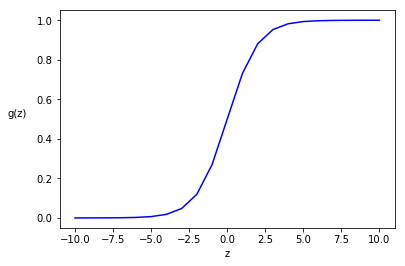

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def logistic(z):
    
    return 1 / (1 + np.exp(-z))

# plot the function
x = np.arange(-10, 11)
plt.plot(x, logistic(x), color = 'blue')
plt.xlabel('z')
plt.ylabel('g(z)', rotation = 0, labelpad = 20)
plt.show()

Now let's define the function $h_\theta$ ( the function we will use to make predictions ) as follows:

$$ h_\theta(\mathbf{x}) = g(\theta^T \mathbf{x}) = \frac{1}{1 + e^{ \, -\theta^T \mathbf{x}} } \,. $$

This function $h_\theta$ will model the probability of a class label $y = 1$ given the feature vector $\mathbf{x}$, and parametrized by $\theta$

$$ P(y = 1 \,|\, \mathbf{x} ; \theta) = h_\theta(\mathbf{x}) \,. $$

Since there are only two classes ( 0 and 1 ), the probability that $y = 0$, given $\mathbf{x}$ and parametrized by $\theta$, can be written as

$$ P(y = 0 \,|\, \mathbf{x} ; \theta) = 1 - h_\theta(\mathbf{x}) \,. $$

An important thing to note is that we are treating $\mathbf{x}$ as a multivariate random variable and $\theta$ as a vector of parameters that we are trying to estimate.  Observe that we can write
 
$$ P(y \,|\, \mathbf{x} ; \theta) = h_\theta(\mathbf{x})^y (1 - h_\theta(\mathbf{x}))^{1-y} \, \qquad (1) $$

since $y$ can only be one of the two values 0 or 1.  Now suppose that we have $m$ training examples $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_m$ that we put as the rows of a feature matrix $X$, and we also have the target vector $\mathbf{y}$ that holds the $m$ labels

$$
X =
\begin{bmatrix}
\, - \,\, \mathbf{x}_1^T - \, \\
\, - \,\, \mathbf{x}_2^T - \, \\
\vdots \\
\, - \,\, \mathbf{x}_m^T - \,
\end{bmatrix} \, , \quad
\mathbf{y} = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
$$ 

Using the matrix $X$ and the vector $\mathbf{y}$, the probability of the data is written as 

$$ P(\mathbf{y} \,|\, X; \theta) \,. $$  

When $P(\mathbf{y} \,|\, X; \theta)$ is considered as a function of the parameters $\theta = (\theta_0, \theta_1, \ldots, \theta_n)^T$, then we give this function a special name, the **likelihood function** ( see [here](https://en.wikipedia.org/wiki/Likelihood_function) ).  The notation we use is

$$ L(\theta) = P(\mathbf{y} \,|\, X; \theta) \,. $$

We want to find $\theta_0, \theta_1, \ldots, \theta_n$ that maximize the likelihood function $L(\theta)$.  This is how we will derive the supervised learning algorithm for logistic regression.

But let's take a break from this and describe an example we will work through.  This example comes from one of the programming exercises in Andrew Ng's machine learning course.  An administrator of a university department wants to determine an applicant's chance of admission based on their results from two exams.  The administrator has [data](https://github.com/marty-vanhoof/Maching_Learning/blob/master/data/logReg_data1.txt) consisting of previous applicant's exam scores and whether they were admitted to the university of not.  Let's look at the data

In [2]:
import os
import pandas as pd

# load the dataframe and display first 5 rows
filepath = os.getcwd() + '/logReg_data1.txt'
df = pd.read_csv(filepath, names = ['exam1', 'exam2', 'admitted'])
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Our training data has two features:  ```exam1``` and ```exam2```, and these features are both continuous variables.   The target variable is called ```admitted```, and this is a categorical variable consisting of the labels 0 or 1 (0 means that the applicant was not admitted and 1 means that the applicant was admitted).  We will use this data to build a model that estimates the probability that an applicant will be admitted to the university, given their scores on the two exams.

<a id='box'></a>
### Boxplot

Boxplots give a graphical display of five important statistics associated with any distribution:  the minimum, 25th percentile, median, 75th percentile, and maximum.  They can be very useful for comparing the distributions of continuous variables across different categories.  In this case, we are comparing the distributions of scores for ```exam1``` and ```exam2``` based on whether the applicant was admitted or not.  

The boxplots below show that the distributions of exam scores for applicants who were admitted/not admitted are skewed relative to each other.  We can see that applicants who were admitted to the university have higher exam scores (on average) than those who were not admitted. 

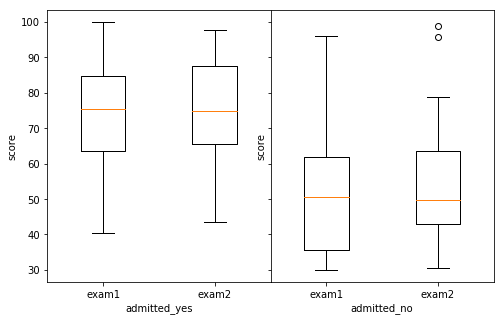

In [3]:
# split the data into 'admitted_yes', 'admitted_no'
admitted_yes = df[ df.admitted == 1 ]
admitted_no = df[ df.admitted == 0 ]
data = [admitted_yes, admitted_no]
xlabels = ['admitted_yes', 'admitted_no']

# make the plot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 5), sharey = True)
fig.subplots_adjust(wspace = 0)
for i in range(0,2):
    ax[i].boxplot( [data[i].exam1, data[i].exam2], widths = [0.4, 0.4] )
    ax[i].set( xticklabels = ['exam1', 'exam2'], xlabel = xlabels[i], ylabel = 'score' )

<a id='scatter'></a>
### Scatterplot

We would like to trace out a boundary between the two classes that will classify the data into 'admitted_yes' or 'admitted_no'.  This boundary is called a **decision boundary**, and logistic regression will help us find a linear decision boundary between the two classes and make class predictions.  We haven't found the decision boundary yet, so in the code below, we set decision_boundary to False.  

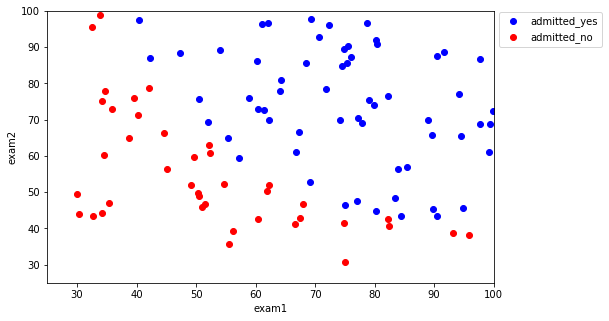

In [4]:
def scatterplot(decision_boundary = False):
    '''Plot the training data using a scatterplot.  
    If decision_boundary is set to True, then plot the boundary.
    Note that the theta parameters are not actually defined yet.
    Keep decision_boundary set to False until the theta parameters
    are found.'''

    fig, ax = plt.subplots(figsize = (8,5))
    
    if decision_boundary:
        # plot the decision boundary
        x1 = np.linspace(df.exam1.min(), df.exam1.max(), 50)
        x2 = (-theta_1/theta_2)*x1 - (theta_0/theta_1)
        plt.plot(x1, x2, color = 'black', label = 'decision boundary')

    # plot the training data
    plt.scatter(admitted_yes.exam1, admitted_yes.exam2, color = 'blue', label = 'admitted_yes')
    plt.scatter(admitted_no.exam1, admitted_no.exam2, color = 'red', label = 'admitted_no')
    plt.xlabel('exam1')
    plt.ylabel('exam2')
    plt.xlim(25,100)
    plt.ylim(25,100)
    plt.legend(bbox_to_anchor = (1,0.85), loc = 3)
    plt.show()
    
scatterplot()

<a id='cost_func'></a>
### The Cost Function for Logistic Regression

Our goal is to find an algorithm that will learn the parameters $\theta = (\theta_0, \theta_1, \ldots, \theta_n)^T$ in order to maximize the likelihood function

$$ L(\theta) = P(\mathbf{y} \,|\, X; \theta) $$

Let's assume that our $m$ training examples are *independent*, so that

\begin{align*} 
P(\mathbf{y} \,|\, X; \theta) &= \prod_{i=1}^m P(y_i \,|\, \mathbf{x}_i; \theta) \\
                              &= \prod_{i=1}^m h_\theta(\mathbf{x}_i)^{y_i} (1 - h_\theta(\mathbf{x}_i))^{1 - y_i} 
\end{align*}

where the first equality is because of the independence assumption and the last equality is due to $(1)$ above.  In practice, it is easier to maximize the **log-likelihood** $\ell(\theta)$, which is the natural logarithm of the likelihood function

\begin{align*}
\ell(\theta) &= \ln L(\theta) \\
&= \ln \bigg[ \prod_{i=1}^m h_\theta(\mathbf{x}_i)^{y_i} (1 - h_\theta(\mathbf{x}_i))^{1 - y_i} \bigg] \\ 
&= \sum_{i=1}^m y_i \ln h_\theta(\mathbf{x}_i) + (1 - y_i) \ln(1 - h_\theta(\mathbf{x}_i)) \,. 
\end{align*}

Since the logarithm function is increasing, maximizing $L(\theta)$ is equivalent to maximizing $\ell(\theta) = \ln L(\theta)$.  Also note that maximizing $\ell(\theta)$ is equivalent to minimizing $- \ell(\theta)$.  The reason we want to minimize $- \ell(\theta)$ is because we can use the gradient descent algorithm again.  Recall that in [linear regression](https://github.com/marty-vanhoof/Maching_Learning/blob/master/Linear_Regression/Linear_Regression.ipynb), we used gradient descent to minimize a certain cost function $J(\theta)$.  In the case of logistic regression, we use the negative log-likelihood as our cost function, so we want to minimize

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m - y_i \ln h_\theta(\mathbf{x}_i) - (1 - y_i) \ln (1 - h_\theta(\mathbf{x}_i)) \,. $$ 

It turns out that this function is convex (here is a [proof](http://mathgotchas.blogspot.ca/2011/10/why-is-error-function-minimized-in.html)), so the gradient descent algorithm will eventually converge to the global minimum of $J(\theta)$ with a suitable learning rate $\alpha$.  Let's write this cost function in Python using numpy matrix operations.

Recall that $h_\theta(\mathbf{x}_i) = g(\theta^T \mathbf{x}_i)$, where $g$ is the logistic function.  Let $\mathbf{1}, \mathbf{ln}_h$ and $\mathbf{ln}_{1-h}$ be the (m x 1) column vectors defined as follows:

$$
\mathbf{1} =
\begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix} \, , \quad
\mathbf{ln}_h =
\begin{bmatrix}
\ln h_\theta(\mathbf{x}_1) \\
\ln h_\theta(\mathbf{x}_2) \\
\vdots \\ 
\ln h_\theta(\mathbf{x}_m)
\end{bmatrix} \, , \quad
\mathbf{ln}_{1-h} =
\begin{bmatrix}
\ln (1 - h_\theta(\mathbf{x}_1)) \\
\ln (1 - h_\theta(\mathbf{x}_2)) \\
\vdots \\ 
\ln (1 - h_\theta(\mathbf{x}_m)) 
\end{bmatrix} \,. 
$$

Then in matrix form, the cost function can be written as

$$ J(\theta) = -\frac{1}{m} \big[\, \mathbf{y}^T \mathbf{ln}_h + (\mathbf{1} - \mathbf{y})^T \mathbf{ln}_{1 - h} \,\big] \,. $$

We can implement this very easily with numpy.

In [5]:
def logReg_cost(theta, X, y):
    '''Compute the cost function. 
    Inputs:
    X is an m by (n+1) numpy array, where m = # of training examples
                                     n = # of features (excluding the "1" column)
    y is an m by 1 numpy array
    theta is a 1 by (n+1) numpy array'''
    
    # first transform the inputs to numpy matrices
    X, y, theta = np.matrix(X), np.matrix(y), np.matrix(theta)
    
    ln_h = np.log( logistic(X*theta.T) )
    ln_1h = np.log( 1 - logistic(X*theta.T) ) 
    J_theta = ( -1/len(y) )*( y.T*ln_h + (1 - y.T)*ln_1h )
    
    return J_theta[0,0]

Recall that in our example, the training data consists of exam scores (```exam1```, ```exam2```) for students who applied to a university, along with a column called ```admitted``` that contains information about whether each student was admitted to the university or not.  This column consists of the labels 1 or 0 (1 if the students was admitted, 0 otherwise). 

Let's compute the cost function on our dataset with $\theta$ initialized to all zeros:  $\, \theta = (0,0,0)$.  The feature matrix $X$ will consist of the two columns ```exam1``` and ```exam2``` (plus a column of ones by convention).  The target vector $\mathbf{y}$ will consist of the class labels for each training example, so $\mathbf{y}$ is just the ```admitted``` column

In [6]:
# insert column of ones and look a first 5 rows
df.insert(0, 'ones', 1)
df.head()

,ones,exam1,exam2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [7]:
# get the feature matrix X, target vector y, and initialize theta to (0,0,0)
X = df.iloc[:, 0:3].values
y = df.iloc[:, 3:4].values
theta = np.zeros(3)#.reshape((1,3))

# compute the cost function with initial theta
print('cost with initial theta: ', logReg_cost(theta, X, y))

cost with initial theta:  0.69314718056


<a id='grad_descent'></a>
### Gradient Descent

We are trying to minimize the cost function

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m - y_i \ln h_\theta(\mathbf{x}_i) - (1 - y_i) \ln (1 - h_\theta(\mathbf{x}_i)) \,. $$ 

Since $J(\theta)$ is a convex function with a global minimum, we can use gradient descent to find this minimum value.  The graph of $J(\theta)$ is a 3-dimensional manifold in $\mathbb{R}^4$.  If we start at any point on the manifold, then the negative gradient points in the direction of steepest descent.  The gradient descent algorithm will follow the negative gradient on each iteration, and given a suitable learning rate $\alpha$ (which controls the size of each step), the algorithm will eventually converge to this global minimum point.

Recall from multivariable calculus that the gradient, $\nabla J$, of the function $J: \mathbb{R}^{n+1} \rightarrow \mathbb{R}$ is computed as the vector of partial derivatives

$$
\nabla J =
\begin{bmatrix}
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\vdots \\
\frac{\partial J}{\partial \theta_n}
\end{bmatrix} \,.
$$

Each iteration of the gradient descent algorithm will update the parameter vector $\theta$ according to the rule

$$ \theta := \theta - \alpha \nabla J(\theta) \,, $$

So for $j = 0, \ldots, n$, each coordinate of $\theta$ will be updated as

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) \, \qquad (2) $$

We will compute the partial derivative of $J(\theta)$ with respect to $\theta_j$.  As a first step, it's not hard to verify that the derivative of the logistic function is given as follows

$$ g'(z) = g(z)(1 - g(z)) \,. $$

So if $z = \theta_0 + \theta_1 x_{i1} + \ldots + \theta_n x_{in} = \theta^T \mathbf{x}_i$, then by the chain rule we get

\begin{align*}
\frac{\partial}{\partial \theta_j} g(\theta^T \mathbf{x}_i) &= g(\theta^T \mathbf{x}_i)(1 - g(\theta^T \mathbf{x}_i)) 
\frac{\partial}{\partial \theta_j} \theta^T \mathbf{x}_i \\ 
                                                            &= g(\theta^T \mathbf{x}_i)(1 - g(\theta^T \mathbf{x}_i)) \, x_{ij}  
\end{align*}

Therefore, we have

\begin{align*}
\frac{\partial}{\partial \theta_j} J(\theta) &= \frac{\partial}{\partial \theta_j} \bigg[ \frac{1}{m} \sum_{i=1}^m - y_i \ln g(\theta^T \mathbf{x}_i) - (1 - y_i) \ln (1 - g(\theta^T \mathbf{x}_i)) \bigg] \\
                                             &= -\frac{1}{m} \sum_{i=1}^m \bigg[ \frac{y_i}{g(\theta^T \mathbf{x}_i)} - \frac{1 - y_i}{1 - g(\theta^T \mathbf{x}_i)} \bigg] \frac{\partial}{\partial \theta_j} g(\theta^T \mathbf{x}_i) \\
                                             &= -\frac{1}{m} \sum_{i=1}^m \bigg[ \frac{y_i}{g(\theta^T \mathbf{x}_i)} - \frac{1 - y_i}{1 - g(\theta^T \mathbf{x}_i)} \bigg] g(\theta^T \mathbf{x}_i)(1 - g(\theta^T \mathbf{x}_i)) \, x_{ij} \\
                                             &= -\frac{1}{m} \sum_{i=1}^m \big( y_i (1 - g(\theta^T \mathbf{x}_i)) - (1 - y_i) g(\theta^T \mathbf{x}_i) \big) \, x_{ij} \\
                                             &= -\frac{1}{m} \sum_{i=1}^m (y_i - g(\theta^T \mathbf{x}_i)) \, x_{ij}\\
                                             &= \frac{1}{m} \sum_{i=1}^m (h_\theta(\mathbf{x}_i) - y_i) \, x_{ij}
\end{align*}

so the update rule $(2)$ becomes

$$ \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(\mathbf{x}_i) - y_i) \, x_{ij} \quad \textrm{for all } \, j = 0, \ldots, n $$

and we should repeat this until the algorithm coverges.  

Now let's implement the gradient computation with a Python function.  Our function will compute the gradient vector, but not actually implement gradient descent.  Then we will use the [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) module to find the optimal value of $\theta$.  The gradient, $\nabla J(\theta)$, is the vector whose $j^{th}$ entry is given by

$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(\mathbf{x}_i) - y_i) \, x_{ij} \,. $$

Let $\mathbf{h}_\theta$ be the column vector consisting of the entries $h_\theta(\mathbf{x}_i)$ for $i = 1, \ldots, m$

$$
\mathbf{h}_\theta =
\begin{bmatrix}
h_\theta(\mathbf{x}_1) \\
h_\theta(\mathbf{x}_2) \\
\vdots \\
h_\theta(\mathbf{x}_m)
\end{bmatrix} \,. 
$$

The gradient can now be written as

$$ \nabla J(\theta) = \frac{1}{m} (\, \mathbf{h}_\theta - \mathbf{y} \,)^T X \,, $$

so we can implement this using numpy matrix operations.

In [8]:
def logReg_gradient(theta, X, y):
    '''Compute the gradient of the logistic regression cost function. 
    Inputs:
    X is an m by (n+1) numpy array, where m = # of training examples
                                     n = # of features (excluding the "1" column)
    y is an m by 1 numpy array
    theta is a 1 by (n+1) numpy array
    Output:
    1 by (n+1) numpy array of partial derivatives'''
    
    # transform the inputs to numpy matrices
    X, y, theta = np.matrix(X), np.matrix(y), np.matrix(theta)
    
    h_theta = logistic(X*theta.T)
    gradient = ( 1 / len(y) )*(h_theta - y).T * X
    return np.array(gradient)

In [9]:
grad = logReg_gradient(theta, X, y)
print( grad )

[[ -0.1        -12.00921659 -11.26284221]]


<a id='scipy'></a>
### Using SciPy to Optimize the Parameters

Instead of implementing the gradient descent algorithm ourselves ( which would require experimentation to find a suitable learning rate $\alpha$ ), we will use Python's SciPy library to find the optimal $\theta$ parameters.  SciPy is a very powerful libary used for scientific and technical computing, and within SciPy there a module called [optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) that has a large number of tools for performing mathematical optimization.  One of these tools is a function called [fmin_tnc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_tnc.html#scipy.optimize.fmin_tnc)

In [10]:
from scipy.optimize import fmin_tnc

We will be passing this function 4 parameters:

```
fmin_tnc(func, x0, fprime, args)
```

- ```func``` is the function we want to minimize.  In our case, this is the function ```logReg_cost``` that we wrote above.
- ```x0``` is our starting value or initial estimate, which is $\theta = (0,0,0)$.
- ```fprime``` is the gradient of ```logReg_cost``` ( the gradient of $J(\theta)$ ).
- ```args``` are the arguments to pass to the function, so ```args``` = $(X,y)$.

The function will return an array of fitted parameters, the number of function evaluations, along with a return code. The return code 0 below means that the algorithm has found the minimum value.

In [11]:
# run fmin_tnc() and get the theta_fit parameters
result = fmin_tnc( func=logReg_cost, x0=theta, fprime=logReg_gradient, args=(X,y) )
theta_fit = result[0]
theta_0 = theta_fit[0]
theta_1 = theta_fit[1]
theta_2 = theta_fit[2]

print( 'result of fmin_tnc: ', result, '\n')
print( 'theta_fit = ', theta_fit, '\n' )
print( 'theta_fit components: ', theta_0, theta_1, theta_2 )

result of fmin_tnc:  (array([-25.16131861,   0.20623159,   0.20147149]), 36, 0) 

theta_fit =  [-25.16131861   0.20623159   0.20147149] 

theta_fit components:  -25.1613186128 0.206231588655 0.201471485896


<a id='prob_pred'></a>
### Estimating Probabilities / Making Predictions

The parameters returned by the optimization algorithm are $\theta_0 = -25.16$, $\theta_1 = 0.2062$, and $\theta_2 = 0.2015$ ( rounded to 4 significant figures ).  Now we can use these to estimate the probability of admission based on an applicant's scores on the two exams.  

In [12]:
def estimate_probability(exam1, exam2):
    '''Estimate the probability of admission based on the scores of
    exam1 and exam2'''
    
    z = theta_0 + theta_1*exam1 + theta_2*exam2
    return logistic(z)

For example, based on our model, for an applicant who scored 45 on Exam 1 and 85 on Exam 2, their admission probability is about 78%

In [13]:
estimate_probability(45, 85)

0.7762906228256099

We can also use the logistic model to predict binary outcomes by specifying a probability threshold.  For example we can predict that a student will be admitted (class label 1) if their admission probability is at least 50%.  Similarly, we can predict that a student will not be admitted (class label 0) if their admission probability is less than 50%.  Then we can evaluate how our model performs on the training data.  In doing this, we will actually be committing one of the cardinal sins of machine learning:  Not splitting our data into separate training and test sets.  This can lead to something called **overfitting**, where our model performs well on the training data, but does poorly on new unseen data.

But for now, let's just see how we can make predictions and evaluate the accuracy of our model on the training data.  The **accuracy** is defined as the number of correct predictions divided by the total number of predictions.

In [14]:
def predict(theta, X):
    '''Make predictions for each training example in X.
    Predict 1 if probability >= 0.5 and 0 otherwise.
    Returns an array of m predictions.'''
    
    theta, X = np.matrix(theta), np.matrix(X)
    probs = logistic(X * theta.T)
    predictions = ( probs >= 0.5 ).astype(int)
    return np.array(predictions)

def accuracy(predictions, y):
    '''Compute the accuracy of the model by comparing the
    array of predictions to the target vector y.
    Returns the proportion of correct predictions.'''
    
    correct = (predictions == y).astype(int)
    accuracy = sum(correct) / len(predictions)
    return accuracy[0]

In [15]:
predictions = predict(theta_fit, X)
accuracy_percent = accuracy(predictions, y) * 100
print( 'accuracy: {}%'.format(accuracy_percent) )

accuracy: 89.0%


What this means is that on the training set, the percentage of correct predictions is 89%.  This seems pretty nice, but is misleading because we didn't test our model on new unseen data.  So the accuracy we computed is probably higher than it's true performance.  We will discuss this issue in more detail in a later article.

<a id='decision_boundary'></a>
### Plotting the Decision Boundary

Let's plot the decision boundary for the scatterplot that we made above.  This decision boundary will be based on the fitted $\theta$ parameters that we got as the output from our logistic regression model.  The boundary will be a line separating the applicants who were not admitted from the applicants who were admitted to the university.  To do this, we need a binary prediction (not a probability), so we will use the same probability threshold as above, which means that if an applicant has an admission probability of at least 0.5, then we will classify them as admitted, and if their admission probability is less than 0.5, then we will classify them as not admitted.

Note that

\begin{align*}
h_\theta(\mathbf{x}) = \frac{1}{1 + e^{-\theta^T \mathbf{x}}} = 0.5 &\Longleftrightarrow e^{-\theta^T \mathbf{x}} = 1 \\
                                                                    &\Longleftrightarrow \theta^T \mathbf{x} = 0 \\
                                                                    &\Longleftrightarrow \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 \\
                                                                    &\Longleftrightarrow x_2 = -\frac{\theta_1}{\theta_2} x_1 - \frac{\theta_0}{\theta_1}
\end{align*}

so this line will be our decision boundary.  Here, $x_1, x_2$ are variables representing the scores on exam1 and exam2 respectively, and $\theta_0, \theta_1, \theta_2$ were found above by the optimization algorithm.  As a reminder, the fitted $\theta$ parameters are given as

In [16]:
print( 'theta_0 = ', theta_0 )
print( 'theta_1 = ', theta_1 )
print( 'theta_2 = ', theta_2 )

theta_0 =  -25.1613186128
theta_1 =  0.206231588655
theta_2 =  0.201471485896


and here is the scatterplot with the decision boundary

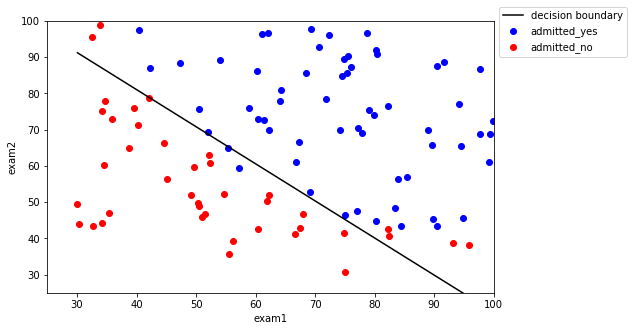

In [17]:
scatterplot(decision_boundary = True)

.